In [1]:
import numpy as np #library to work with vectors and matrix
import matplotlib.pyplot as plt #library to work with graphics and plots

%matplotlib inline

In [2]:
def mnist(path=None):
    r"""Return (train_images, train_labels, test_images, test_labels).

    Args:
        path (str): Directory containing MNIST. Default is
            /home/USER/data/mnist or C:\Users\USER\data\mnist.
            Create if nonexistant. Download any missing files.

    Returns:
        Tuple of (train_images, train_labels, test_images, test_labels), each
            a matrix. Rows are examples. Columns of images are pixel values.
            Columns of labels are a onehot encoding of the correct class.
    """
    #Taken from: 'https://mattpetersen.github.io/load-mnist-with-numpy'
    import gzip
    import os
    from urllib.request import urlretrieve

    url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz',
             'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz',
             't10k-labels-idx1-ubyte.gz']

    if path is None:
        # Set path to /home/USER/data/mnist or C:\Users\USER\data\mnist
        path = os.path.join(os.path.expanduser('~'), 'data', 'mnist')

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download any missing files
    for file in files:
        if file not in os.listdir(path):
            urlretrieve(url + file, os.path.join(path, file))
            print("Downloaded %s to %s" % (file, path))

    def _images(path):
        """Return images loaded locally."""
        with gzip.open(path) as f:
            # First 16 bytes are magic_number, n_imgs, n_rows, n_cols
            pixels = np.frombuffer(f.read(), 'B', offset=16)
        return pixels.reshape(-1, 784).astype('float32') / 255

    def _labels(path):
        """Return labels loaded locally."""
        with gzip.open(path) as f:
            # First 8 bytes are magic_number, n_labels
            integer_labels = np.frombuffer(f.read(), 'B', offset=8)

        def _onehot(integer_labels):
            """Return matrix whose rows are onehot encodings of integers."""
            n_rows = len(integer_labels)
            n_cols = integer_labels.max() + 1
            onehot = np.zeros((n_rows, n_cols), dtype='uint8')
            onehot[np.arange(n_rows), integer_labels] = 1
            return onehot

        return _onehot(integer_labels)

    train_images = _images(os.path.join(path, files[0]))
    train_labels = _labels(os.path.join(path, files[1]))
    test_images = _images(os.path.join(path, files[2]))
    test_labels = _labels(os.path.join(path, files[3]))

    return train_images, train_labels, test_images, test_labels

In [3]:
train_images, train_labels, test_images, test_labels = mnist("../datasets/MNIST")

In [4]:
def from_one_hot_to_vector(labels):
    return np.argmax(labels, axis=1)

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def logisticRegression(X, theta):
    return sigmoid(X@theta)

In [7]:
def costFunction(X, Y, theta, lam):
    z = X@theta
    h = sigmoid(z)
    return (1/X.shape[0])*(-Y.T@np.log(h)-(1-Y).T@np.log(1-h)+(lam/2)*theta.T@theta)

In [8]:
def gradient(X, y, theta, lr, lam):
    z = np.dot(X, theta)
    h = sigmoid(z)
    new_theta = theta
    new_theta[0] = 0
    gradient = (np.dot(X.T, (h - y))+lam*new_theta) / y.size
    return theta - lr * gradient

In [18]:
def accuracy(X, Y, theta):
    pred = logisticRegression(X, theta).argmax(axis=1)
    boolarr = pred == Y
    return np.sum(boolarr) / boolarr.size    

In [29]:
lr = [0.1, 0.03, 0.01]
lam = 1
theta1 = np.zeros((train_images.shape[1], train_labels.shape[1]))
theta2 = theta1
theta3 = theta1

In [30]:
costAccumulated1 = []
costAccumulated2 = []
costAccumulated3 = []

In [46]:
%%time
for i in range(100):
    theta1 = gradient(train_images, train_labels, theta1, lr[0], lam)
    theta2 = gradient(train_images, train_labels, theta2, lr[1], lam)
    theta3 = gradient(train_images, train_labels, theta3, lr[2], lam)
    costAccumulated1.append(costFunction(train_images, train_labels, theta1, lam).mean())
    costAccumulated2.append(costFunction(train_images, train_labels, theta2, lam).mean())
    costAccumulated3.append(costFunction(train_images, train_labels, theta3, lam).mean())

CPU times: user 4min 44s, sys: 1min 30s, total: 6min 14s
Wall time: 3min 7s


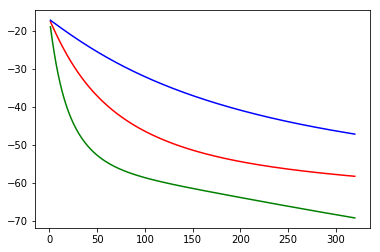

In [47]:
x = [i for i in range(1, len(costAccumulated1)+1)]
plt.plot(x, costAccumulated1, color='green')
plt.plot(x, costAccumulated2, color='red')
plt.plot(x, costAccumulated3, color='blue')

In [48]:
accuracy(test_images, from_one_hot_to_vector(test_labels), theta1)

0.8259

In [49]:
accuracy(test_images, from_one_hot_to_vector(test_labels), theta2)

0.7794

In [50]:
accuracy(test_images, from_one_hot_to_vector(test_labels), theta3)

0.7479